In [21]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tqdm.notebook import tqdm

from pan20 import fake
from pan20.util import text
from pan20.util.lexicons import wordnet_affect

In [36]:
def plot_mu_std(pdf, attr, group=True, std=True):
    if group:
        mdf = pdf.groupby(['author', 'label']).mean().reset_index()
    else:
        mdf = pdf
    sns.distplot(mdf[mdf.label == 0][attr], label='Not Spreader')
    sns.distplot(mdf[mdf.label == 1][attr], label='Spreader')
    plt.legend()
    plt.title(f'Distributions of means of {attr}')
    plt.show()
    if std:
        if group:
            sdf = pdf.groupby(['author', 'label']).std().reset_index()
        else:
            sdf = pdf
        sns.distplot(sdf[sdf.label == 0][attr], label='Not Spreader')
        sns.distplot(sdf[sdf.label == 1][attr], label='Spreader')
        plt.legend()
        plt.title(f'Distributions of stds of {attr}')
        plt.show()

In [6]:
df = fake.load()

In [9]:
wna = wordnet_affect.WordNetAffect()

In [48]:
tokss = []
anger = []
n_anger = []
n_toks = []
with tqdm(total=len(df)) as pbar:
    for _, x in df.iterrows():
        toks = text.tokenize(x.tweet)
        tokss.append(toks)
        n = len(toks)
        m = sum(1 for t in toks if wna.is_in('anger', t))
        anger.append(m / n)
        n_toks.append(n)
        n_anger.append(m)
        pbar.update()
df['anger'] = anger
df['toks'] = tokss
df['n_toks'] = n_toks
df['n_anger'] = n_anger

In [50]:
b = df.groupby(['author', 'label']).mean().reset_index()
b['anger2'] = b.n_anger / b.n_toks
b.head(20)

,author,label,anger,n_toks,n_anger,anger2
0,06ct0t68y1acizh9eow3g5rhancrppr8,1,0.001752,24.37,0.04,0.001641
1,071nxc49ihpd0jlfmvn2lghtayy3b5n9,0,0.003367,18.18,0.05,0.002750
2,09py5qescynpnnckmzueqzr2y49moh1o,0,0.000931,20.81,0.02,0.000961
3,0dwovd7nj6yg9m795ng2c629me0ccmrh,0,0.002675,24.73,0.06,0.002426
4,0ibi364m7i7l01xi4xqafyathrmrrnll,1,0.002664,26.99,0.07,0.002594
5,0s308xu8rhhuqlj0jbh49z0kdx5sr2b9,1,0.001000,16.74,0.01,0.000597
6,11d9lz40vkh06i6tp2mubr1qbohm8biv,1,0.002595,23.19,0.07,0.003019
7,14ka43f4ho6puh4iyhrfzsbrdpy5yixi,0,0.002839,24.61,0.07,0.002844
8,18n59cv9zps9sm601zu95z680wma6cvw,0,0.000769,14.90,0.01,0.000671
9,1jjc4qfpeeffirv6pnq9aulrlk2fgl3k,1,0.002992,19.95,0.06,0.003008


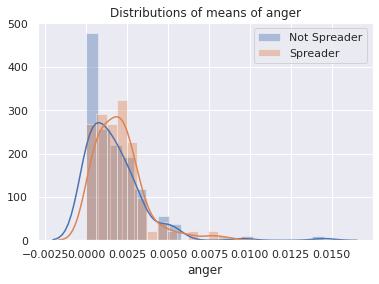

In [53]:
plot_mu_std(b, 'anger', False, False)

So we can't get any closer by just taking the average over all tweets per user instead of tweets then users.